In [11]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [12]:
student_data = pd.read_csv("student_education_data.csv")
print(sklearn.__version__)

1.0.2


In [13]:
student_data

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,PrimaryGuardian,RaisedHand,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Performance
0,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,Average
1,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,Average
2,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,Below Average
3,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,Below Average
4,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,Below Average
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,Average
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,Average
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,Below Average


In [14]:
#Students from Kuwait and Jordan birthplaces made a majority of the students, will serve as our sample populations

Kuwait_Students = student_data.loc[student_data["PlaceofBirth"]=="Kuwait"]
Kuwait_Students


,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,PrimaryGuardian,RaisedHand,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Performance
0,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,Average
1,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,Average
2,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,Below Average
3,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,Below Average
4,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,F,Kuwait,Kuwait,PrimarySchool,G-04,A,History,S,Father,80,97,86,95,Yes,Good,Under-7,Average
259,M,Kuwait,Kuwait,PrimarySchool,G-04,A,English,S,Mother,69,34,12,17,No,Bad,Above-7,Below Average
260,M,Kuwait,Kuwait,PrimarySchool,G-04,A,History,S,Father,10,17,12,14,No,Bad,Above-7,Below Average
261,M,Kuwait,Kuwait,PrimarySchool,G-04,A,History,S,Father,61,97,82,64,Yes,Bad,Above-7,Average


In [15]:
student_data.describe()


,RaisedHand,VisitedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [16]:
#Grab total Number of Kuwait students 

len(Kuwait_Students)

180

In [17]:
#School Age Group as categorization of students

Kuwait_StudentsPrimary = Kuwait_Students.loc[Kuwait_Students["StageID"]=="PrimarySchool"]
Kuwait_StudentsMiddle = Kuwait_Students.loc[Kuwait_Students["StageID"]=="MiddleSchool"]
Kuwait_StudentsHigh = Kuwait_Students.loc[Kuwait_Students["StageID"]=="Highschool"]

In [18]:
# Unique command to see how many unique subjects consisted within the groups of students

Kuwait_StudentsPrimary["Topic"].unique()


array(['IT', 'English', 'French', 'Math', 'Science', 'Arabic', 'History'],
      dtype=object)

In [19]:
#Separated the data based of subjects/topic

it = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="IT"]

english = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="English"]

math = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="Math"]

science = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="Science"] 

history = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="History"]



In [20]:
#Grabbing Section of students with highest sample size, also only really concerned with IT subject regardless

print(len(Kuwait_StudentsPrimary), len(it))

73 54


In [21]:
it

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,PrimaryGuardian,RaisedHand,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Performance
0,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,Average
1,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,Average
2,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,Below Average
3,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,Below Average
4,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,Average
5,F,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,Average
12,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,5,1,0,11,No,Bad,Above-7,Below Average
81,M,Kuwait,Kuwait,PrimarySchool,G-02,A,IT,F,Father,8,25,1,70,No,Bad,Above-7,Below Average
82,M,Kuwait,Kuwait,PrimarySchool,G-02,B,IT,F,Father,7,5,2,80,Yes,Good,Above-7,Below Average
83,M,Kuwait,Kuwait,PrimarySchool,G-02,B,IT,F,Father,7,4,10,50,No,Good,Above-7,Average


In [22]:
#Grab the count to display gender distribution

count_student_male = len(it.loc[it["Gender"]=="M"])
count_student_female = len(it) - count_student_male

Text(0.5, 1.0, 'Kuwait PrimarySchool IT Gender Distribution')

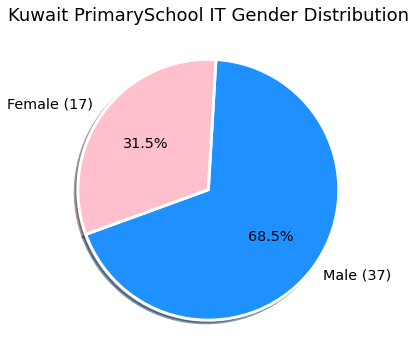

In [23]:
#Gender distribution for Kuwait IT primary school

student_count = [count_student_male, count_student_female]
labels = ["Male ("+ str(count_student_male)+")", "Female ("+ str(count_student_female)+")"]
colors = ["dodgerblue", "pink"]

fig, ax = plt.subplots(figsize=(6,6))

patches, texts, pcts = ax.pie ( 
    student_count, labels=labels, autopct="%.1f%%", 
    wedgeprops={"linewidth": 3.0, "edgecolor": "white"},
    textprops={"size": "x-large"},
    startangle=200, 
    shadow = True,
    colors = colors)

ax.set_title("Kuwait PrimarySchool IT Gender Distribution", fontsize = 18)



In [24]:
#Separated Columns by Gender and Performance Category

Male_Below_Average = it.loc[(it["Gender"]== "M") & (it["Performance"]=="Below Average")]
Male_Average = it.loc[(it["Gender"]== "M") & (it["Performance"]=="Average")]
Male_Above_Average = it.loc[(it["Gender"]== "M") & (it["Performance"]=="Above Average")]

Female_Below_Average = it.loc[(it["Gender"]== "F") & (it["Performance"]=="Below Average")]
Female_Average = it.loc[(it["Gender"]== "F") & (it["Performance"]=="Average")]
Female_Above_Average = it.loc[(it["Gender"]== "F") & (it["Performance"]=="Above Average")]

In [25]:
#Collected Individual Averages of columns in order to graph 

MB_Raised_Hand_Avg = (sum(Male_Below_Average["RaisedHand"].to_numpy())) / len(Male_Below_Average["RaisedHand"].to_numpy())
MB_Visited_Res_Avg = (sum(Male_Below_Average["VisitedResources"].to_numpy()) / len(Male_Below_Average["VisitedResources"].to_numpy()))
MB_Discussion_Avg = (sum(Male_Below_Average["Discussion"].to_numpy())) / len(Male_Below_Average["Discussion"].to_numpy())

FB_Raised_Hand_Avg = (sum(Female_Below_Average["RaisedHand"].to_numpy())) / len(Female_Below_Average["RaisedHand"].to_numpy())
FB_Visited_Res_Avg = (sum(Female_Below_Average["VisitedResources"].to_numpy()) / len(Female_Below_Average["VisitedResources"].to_numpy()))
FB_Discussion_Avg = (sum(Female_Below_Average["Discussion"].to_numpy())) / len(Female_Below_Average["Discussion"].to_numpy())

In [26]:
#Data Collection

below_male_data = [MB_Raised_Hand_Avg, MB_Visited_Res_Avg, MB_Discussion_Avg]
below_female_data = [FB_Raised_Hand_Avg, FB_Visited_Res_Avg, FB_Discussion_Avg]

below_average_students = it.loc[it["Performance"] == "Below Average"]
attendance = Counter(below_average_students["StudentAbsenceDays"])
absences = ["Under 7 Days", "Above 7 Days"]
counts = [attendance["Under-7"], attendance["Above-7"]]

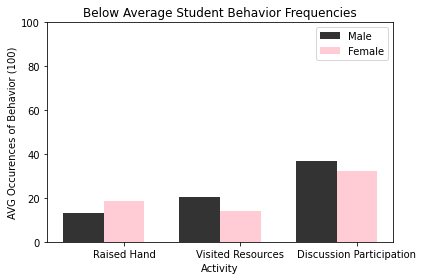

In [27]:
#Graph Data For Below Average Students

groups = 3

fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = .35
opacity = .8

first_rect = plt.bar(index, below_male_data, bar_width,
                     alpha = opacity,
                     color = "black",
                     label = "Male")

second_rect = plt.bar(index + bar_width, below_female_data, bar_width,
                     alpha = opacity,
                     color = "pink",
                     label = "Female")

plt.xlabel("Activity")
plt.ylabel("AVG Occurences of Behavior (100)")
plt.title("Below Average Student Behavior Frequencies")
plt.xticks(index + bar_width, ('Raised Hand', 'Visited Resources', 'Discussion Participation'))
plt.ylim([0, 100])
plt.legend()
plt.tight_layout()



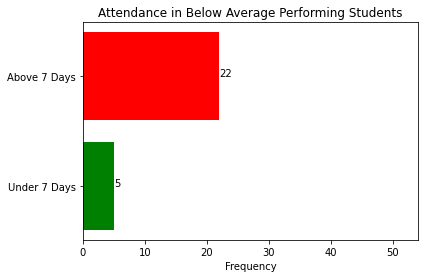

In [28]:
plt.title("Attendance in Below Average Performing Students")
plt.barh(absences, counts, color=["Green", "Red"])
plt.xlim([0, 54])
plt.xlabel("Frequency")
for index, value in enumerate(counts):
    plt.text(value, index, str(value))


In [29]:
#Data Averages Calculated for above average performing students

MA_Raised_Hand_Avg = (sum(Male_Above_Average["RaisedHand"].to_numpy())) / len(Male_Above_Average["RaisedHand"].to_numpy())
MA_Visited_Res_Avg = (sum(Male_Above_Average["VisitedResources"].to_numpy()) / len(Male_Above_Average["VisitedResources"].to_numpy()))
MA_Discussion_Avg = (sum(Male_Above_Average["Discussion"].to_numpy())) / len(Male_Above_Average["Discussion"].to_numpy())

FA_Raised_Hand_Avg = (sum(Female_Above_Average["RaisedHand"].to_numpy())) / len(Female_Above_Average["RaisedHand"].to_numpy())
FA_Visited_Res_Avg = (sum(Female_Above_Average["VisitedResources"].to_numpy()) / len(Female_Above_Average["VisitedResources"].to_numpy()))
FA_Discussion_Avg = (sum(Female_Above_Average["Discussion"].to_numpy())) / len(Female_Above_Average["Discussion"].to_numpy())

In [30]:
#Data organized and attendance behavior recorded for displaying

above_male_data = [MA_Raised_Hand_Avg, MA_Visited_Res_Avg, MA_Discussion_Avg]
above_female_data = [FA_Raised_Hand_Avg, FA_Visited_Res_Avg, FA_Discussion_Avg]

above_average_students = it.loc[it["Performance"] == "Above Average"]

attendance = Counter(above_average_students["StudentAbsenceDays"])
absences = ["Under 7 Days", "Above 7 Days"]
counts = [attendance["Under-7"], attendance["Above-7"]]

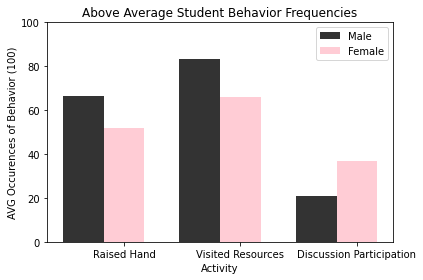

In [31]:
#Graph Data For Above Average Students

groups = 3

fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = .35
opacity = .8

first_rect = plt.bar(index, above_male_data, bar_width,
                     alpha = opacity,
                     color = "black",
                     label = "Male")

second_rect = plt.bar(index + bar_width, above_female_data, bar_width,
                     alpha = opacity,
                     color = "pink",
                     label = "Female")

plt.xlabel("Activity")
plt.ylabel("AVG Occurences of Behavior (100)")
plt.title("Above Average Student Behavior Frequencies")
plt.xticks(index + bar_width, ('Raised Hand', 'Visited Resources', 'Discussion Participation'))
plt.ylim([0, 100])
plt.legend()
plt.tight_layout()


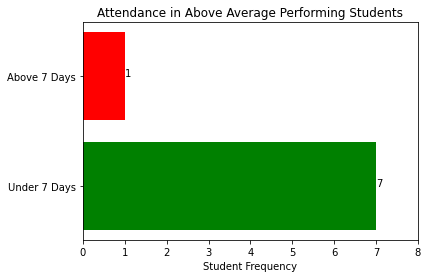

In [32]:
#Attendance Behavior in Above Average Performace Students

plt.title("Attendance in Above Average Performing Students")
plt.barh(absences, counts, color=["Green", "Red"])
plt.xlim([0, 8])
plt.xlabel("Student Frequency")
for index, value in enumerate(counts):
    plt.text(value, index, str(value))


In [33]:
#Ensure Sample Size of Primary Students in Kuwait

len(it)

54

In [34]:
#We Begin Our Regression Analysis by selecting the most relevant Independent Variables to the hypothesis. Models Will be created 
#to test hypothesis that student behavior/performance is positively correlated by parental involvment in academics and that
#actively participating students will outperform students who do not engage actively.

it_regression_data = it[["Gender", "PrimaryGuardian", 
                         "ParentAnsweringSurvey", "RaisedHand", 
                         "VisitedResources", "AnnouncementsView", 
                         "Discussion", "StudentAbsenceDays", "Performance"]]

it_regression_data

,Gender,PrimaryGuardian,ParentAnsweringSurvey,RaisedHand,VisitedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Performance
0,M,Father,Yes,15,16,2,20,Under-7,Average
1,M,Father,Yes,20,20,3,25,Under-7,Average
2,M,Father,No,10,7,0,30,Above-7,Below Average
3,M,Father,No,30,25,5,35,Above-7,Below Average
4,M,Father,No,40,50,12,50,Above-7,Average
5,F,Father,Yes,42,30,13,70,Above-7,Average
12,M,Father,No,5,1,0,11,Above-7,Below Average
81,M,Father,No,8,25,1,70,Above-7,Below Average
82,M,Father,Yes,7,5,2,80,Above-7,Below Average
83,M,Father,No,7,4,10,50,Above-7,Average


In [35]:
'''We single out our dependent variable "Performance" (catorgical), and use the pd.dummies command to convert it into numeric
   instead of Above AVG, Average, Below AVG, it is now Below Average or Not for the purpose of this analysis.'''

w = it_regression_data.loc[:, "Performance"]
performance_col= pd.get_dummies(w, drop_first=True)
performance_col = performance_col.loc[:, "Below Average"]


x = it_regression_data.drop("Performance", axis=1)
y = ["Performance"]

In [36]:
'''We convert any independent categorical variables into numeric using the same method above. Also, student behavior frequency
   columns are turned into percents because it was measured out of 100. Columns are then renamed for clarity'''

x = pd.get_dummies(x, drop_first=True)

x["RaisedHand"] = x["RaisedHand"].div(100).round(2)
x["VisitedResources"] = x["VisitedResources"].div(100).round(2)
x["AnnouncementsView"] = x["AnnouncementsView"].div(100).round(2)
x["Discussion"] = x["Discussion"].div(100).round(2)

x.rename(columns={"Gender_M": "Gender_Male", 
                  "PrimaryGuardian_Mother": "Primary_Guardian_Mother", 
                  "ParentAnsweringSurvey_Yes": "GuardianAnsweredSurvey",
                  "StudentAbsenceDays_Under-7": "AbsencesUnder7Days"}, errors="raise")

,RaisedHand,VisitedResources,AnnouncementsView,Discussion,Gender_Male,Primary_Guardian_Mother,GuardianAnsweredSurvey,AbsencesUnder7Days
0,0.15,0.16,0.02,0.20,1,0,1,1
1,0.20,0.20,0.03,0.25,1,0,1,1
2,0.10,0.07,0.00,0.30,1,0,0,0
3,0.30,0.25,0.05,0.35,1,0,0,0
4,0.40,0.50,0.12,0.50,1,0,0,0
5,0.42,0.30,0.13,0.70,0,0,1,0
12,0.05,0.01,0.00,0.11,1,0,0,0
81,0.08,0.25,0.01,0.70,1,0,0,0
82,0.07,0.05,0.02,0.80,1,0,1,0
83,0.07,0.04,0.10,0.50,1,0,0,0
